**Dataset-1:** This part of the lab will use a dataset that represents student admission into University based on Exam-1 and Exam-2 test scores. The dataset is uploaded in iLearn as Dataset-1. You need to upload it to your Google Colab. 

**Step-1: Import Libraries:** The first step in any project is to import the libraries we are going to use. 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from sklearn.preprocessing import PolynomialFeatures

**Step-2: Load the Data:** The next step is to load the data. In this lab, the dataset is saved as .txt file (previous lab the data was saved as .csv file). Here, we will implement a function that helps us to load the data. 

In [ ]:
def loaddata(file, delimeter):
    data = np.loadtxt(file, delimiter=delimeter)
    print('Dimensions: ',data.shape)
    print(data[1:6,:])
    return(data)

Now, let's load the data for this problem.

In [ ]:
data = loaddata('Dataset-1.txt', ',')

Dimensions:  (100, 3)
[[30.28671077 43.89499752  0.        ]
 [35.84740877 72.90219803  0.        ]
 [60.18259939 86.3085521   1.        ]
 [79.03273605 75.34437644  1.        ]
 [45.08327748 56.31637178  0.        ]]


*Process the data:* Let's separate our X (features) and Y (labels) parts of the data. 

In [ ]:
X = np.c_[np.ones((data.shape[0],1)), data[:,0:2]]
y = np.c_[data[:,2]]

*Plot the data:* We will implement a function to help us with the scatter plot.

In [ ]:
def plotData(data, label_x, label_y, label_pos, label_neg, axes=None):
    # Get indexes for class 0 and class 1
    neg = data[:,2] == 0
    pos = data[:,2] == 1
    
    # If no specific axes object has been passed, get the current axes.
    if axes == None:
        axes = plt.gca()
    axes.scatter(data[pos][:,0], data[pos][:,1], marker='+', c='k', s=60, linewidth=2, label=label_pos)
    axes.scatter(data[neg][:,0], data[neg][:,1], c='y', s=60, label=label_neg)
    axes.set_xlabel(label_x)
    axes.set_ylabel(label_y)
    axes.legend(frameon= True, fancybox = True);

Let's plot the data by calling our plot function. 

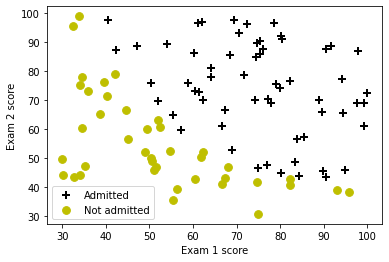

In [ ]:
plotData(data, 'Exam 1 score', 'Exam 2 score', 'Admitted', 'Not admitted')

# Assignment 2 


---

1. Loading the data for assignment 2.

---



In [ ]:
data2 = loaddata('Dataset-2.txt', ',')

Dimensions:  (118, 3)
[[-0.092742  0.68494   1.      ]
 [-0.21371   0.69225   1.      ]
 [-0.375     0.50219   1.      ]
 [-0.51325   0.46564   1.      ]
 [-0.52477   0.2098    1.      ]]


---
2. Plot accepted/rejected microchips against test 1/test 2 scores


---



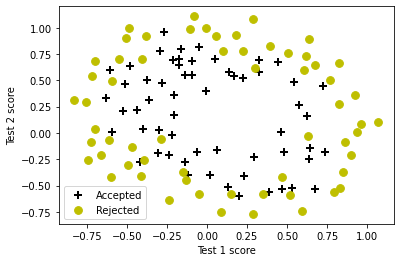

In [ ]:
plotData(data2, 'Test 1 score', 'Test 2 score', 'Accepted', 'Rejected')



---


3. Separating features and labels into X and y, respectively. For assignment purpose, we do not add column of ones in the features, X.
Also, use polynomial features in sklearn to generate polynomial and interaction features.


---

In [ ]:
X_2 = data2[:,0:2]
y = np.c_[data2[:,2]]
poly = PolynomialFeatures(6)
X_poly = poly.fit_transform(X_2)

**Assignment Question**: Can this dataset be separated into positive and negative examples by a linear decision boundary? 

**Answer**: No. The classes of the dataset are distributed in the form of concentric circles. To separate dataset into positive and negative examples by a linear decision boundary means to construct a straight line to separate them. In this case, it is not possible to separate the positive and negative examples of the dataset with a straight line. Hence, if the dataset is not linearly separable, the linear decision boundary would not work to accurately classify the data. 

**Step-3: Implement a Logistic Regression Model:** 

*Step-3.1: Sigmoid Function:* Let's implement the Sigmoid function.

In [ ]:
def sigmoid(z):
    return(1 / (1 + np.exp(-z)))

Let's test it:

In [ ]:
sigmoid(0)

0.5

*Step-3.2: Cost Function and Gradient:* Let's first implement a function to calculate the cost  $J$. This function will return the cost value. 

In [ ]:
def costFunction(theta, X_poly, y, reg):
    m = y.size
    f = sigmoid(X_poly.dot(theta.reshape(-1, 1)))
    reg_term = (reg/(2*m)) * np.sum(np.square(theta[1:]))
    J = -1*(1/m)*(np.log(f).T.dot(y)+np.log(1-f).T.dot(1-y)) + reg_term
               
    if np.isnan(J[0]):
        return(np.inf)
    return(J[0])

Let's implement another function to get the gradient.

In [ ]:
def gradient(theta, X_poly, y, reg):
    m = y.size
    f = sigmoid(X_poly.dot(theta.reshape(-1, 1)))
    reg_term = (reg/m) * np.r_[[[0]],theta[1:].reshape(-1,1)]
    grad = (1/m) * X_poly.T.dot(f-y) + reg_term

    return(grad.flatten())

Let's test our cost and gradient functions.

In [ ]:
initial_theta = np.zeros(X_poly.shape[1])
reg = 0
cost = costFunction(initial_theta, X_poly, y, reg)
grad = gradient(initial_theta, X_poly, y, reg)
print('Cost: \n', cost)
print('Grad: \n', grad)

Cost: 
 [0.69314718]
Grad: 
 [8.47457627e-03 1.87880932e-02 7.77711864e-05 5.03446395e-02
 1.15013308e-02 3.76648474e-02 1.83559872e-02 7.32393391e-03
 8.19244468e-03 2.34764889e-02 3.93486234e-02 2.23923907e-03
 1.28600503e-02 3.09593720e-03 3.93028171e-02 1.99707467e-02
 4.32983232e-03 3.38643902e-03 5.83822078e-03 4.47629067e-03
 3.10079849e-02 3.10312442e-02 1.09740238e-03 6.31570797e-03
 4.08503006e-04 7.26504316e-03 1.37646175e-03 3.87936363e-02]


*Step-3.3: Finding the Optimal $\theta$:* Next, train our model to get the optimal $\theta$ values. This will be done by minimizing the cost function. We will use the built-in minimization function in python.   

In [ ]:
opt_theta = minimize(costFunction, initial_theta, args=(X_poly,y, reg), method=None, jac=gradient, options={'maxiter':400})

Let's print the optimal values of $\theta$. 

In [ ]:
print('Thetas: \n', opt_theta)

Thetas: 
       fun: 0.26349926856428674
 hess_inv: array([[ 2.75706843e+03,  2.40359231e+03,  3.72927678e+03,
        -2.35694736e+04, -4.93583962e+03, -1.73013751e+04,
        -1.41512964e+04, -1.98289507e+04, -5.29971572e+03,
        -1.47407272e+04,  6.31956652e+04,  3.54370295e+04,
         9.80396630e+04,  1.84858829e+04,  3.70133832e+04,
         1.94362519e+04,  3.14469047e+04,  2.28766701e+04,
         2.06724231e+04, -1.21562796e+04,  1.22294868e+04,
        -5.43110802e+04, -5.42501053e+04, -1.27472378e+05,
        -5.00970130e+04, -8.32164723e+04,  1.22453535e+02,
        -2.38654291e+04],
       [ 2.40359231e+03,  4.34450415e+03,  2.53625581e+03,
        -2.06319759e+04, -4.38679776e+03, -1.52536265e+04,
        -2.30236341e+04, -1.16178997e+04, -8.56917356e+03,
        -1.31628521e+04,  5.86031322e+04,  3.64629481e+04,
         9.18763822e+04,  1.50735649e+04,  3.25984981e+04,
         2.98675022e+04,  1.84595479e+04,  2.11414264e+04,
         6.54369489e+03, -6.20766499e

*Step-3.4: Build a Classification Model:* Let's implement a classification function that compares the probability of being in a class with some threshold and then returns the class label. 

In [ ]:
def classify(theta, X_poly, threshold=0.5):
    p = sigmoid(X_poly.dot(theta.T)) >= threshold
    return(p.astype('int'))

Now, let's use the classify function and find the accuracy of our classification. 

In [ ]:
p = classify(opt_theta.x, X_poly) 
print('Train accuracy {}%'.format(100*sum(p == y.ravel())/p.size))

Train accuracy 88.13559322033899%


*Step-3.5: Plot the Decision Boundary:* Let's plot the decision boundary.

<ipython-input-262-71a3b42dc05c>:2: RuntimeWarning: overflow encountered in exp
  return(1 / (1 + np.exp(-z)))


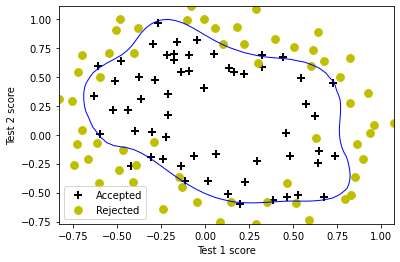

In [ ]:
plotData(data2, 'Test 1 score', 'Test 2 score', 'Accepted', 'Rejected')
x1_min, x1_max = X_poly[:,1].min(), X_poly[:,1].max(),
x2_min, x2_max = X_poly[:,2].min(), X_poly[:,2].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
f = sigmoid(poly.fit_transform(np.c_[xx1.ravel(), xx2.ravel()]).dot(opt_theta.x))
f = f.reshape(xx1.shape)  
plt.contour(xx1, xx2, f, [0.5], linewidths=1, colors='b');

Train accuracy 83.05084745762711%


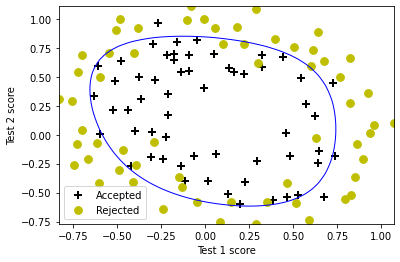

In [ ]:
reg = 1
cost = costFunction(initial_theta, X_poly, y, reg)
grad = gradient(initial_theta, X_poly, y, reg)

opt_theta = minimize(costFunction, initial_theta, args=(X_poly,y, reg), method=None, jac=gradient, options={'maxiter':400})
p = classify(opt_theta.x, X_poly) 
print('Train accuracy {}%'.format(100*sum(p == y.ravel())/p.size))
plotData(data2, 'Test 1 score', 'Test 2 score', 'Accepted', 'Rejected')
x1_min, x1_max = X_poly[:,1].min(), X_poly[:,1].max(),
x2_min, x2_max = X_poly[:,2].min(), X_poly[:,2].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
f = sigmoid(poly.fit_transform(np.c_[xx1.ravel(), xx2.ravel()]).dot(opt_theta.x))
f = f.reshape(xx1.shape)  
plt.contour(xx1, xx2, f, [0.5], linewidths=1, colors='b');

Train accuracy 61.016949152542374%


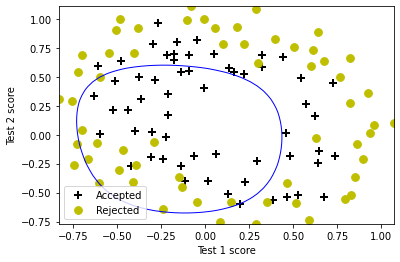

In [ ]:
reg = 100
cost = costFunction(initial_theta, X_poly, y, reg)
grad = gradient(initial_theta, X_poly, y, reg)

opt_theta = minimize(costFunction, initial_theta, args=(X_poly,y, reg), method=None, jac=gradient, options={'maxiter':400})
p = classify(opt_theta.x, X_poly) 
print('Train accuracy {}%'.format(100*sum(p == y.ravel())/p.size))
plotData(data2, 'Test 1 score', 'Test 2 score', 'Accepted', 'Rejected')
x1_min, x1_max = X_poly[:,1].min(), X_poly[:,1].max(),
x2_min, x2_max = X_poly[:,2].min(), X_poly[:,2].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
f = sigmoid(poly.fit_transform(np.c_[xx1.ravel(), xx2.ravel()]).dot(opt_theta.x))
f = f.reshape(xx1.shape)  
plt.contour(xx1, xx2, f, [0.5], linewidths=1, colors='b');

#Analysis Of Model
There are 3 different values of regularization parameter being used, 0, 1, and 100. Therefore, the plots will have different shapes. 

When reg = 0, the plot shows a somewhat wobbly circle centered in the graph. The wobbly shape is caused by the training data being overfitted. 

When reg = 1, the shape of the circle is firm and covers most of the accepted data which means that our model is learning the decision boundary that generalizes better with new data. 

When reg = 100, the decision boundary shifts to the bottom left corner. This indicates that the training data is being underfitted. 

Although the decision boundary fits best when reg = 0, the model is too complex and it is fitting the noise in the data. Hence, the best accuracy is when lambda/reg = 1 which excludes the noise in the data, thus, providing the most accurate result. 

**Built-in Logistic Regression Function:** Let's use the built-in function in python for logistic regression. 

*1-Import Libraries:*

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

*2-Train the Model:*

In [ ]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X_poly, y)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

*3-Test the Model:*

In [ ]:
predictions = logisticRegr.predict(X_poly)

*4-Evaluate the Model:*

In [ ]:
score = logisticRegr.score(X_poly, y)
print(score)

0.8305084745762712


**This is the same score we got using the model we developed from scratch!**

In [ ]:
cm = metrics.confusion_matrix(y, predictions)
print(cm)

[[45 15]
 [ 5 53]]
